In [1]:
# importing the necessary Python libraries and the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("user_profiles_for_ads.csv")

print(data.head())

   User ID    Age  Gender  Location Language Education Level  \
0        1  25-34  Female  Suburban    Hindi       Technical   
1        2    65+    Male     Urban    Hindi             PhD   
2        3  45-54  Female  Suburban  Spanish       Technical   
3        4  35-44  Female     Rural  Spanish             PhD   
4        5  25-34  Female     Urban  English       Technical   

   Likes and Reactions  Followed Accounts  Device Usage  \
0                 5640                190   Mobile Only   
1                 9501                375        Tablet   
2                 4775                187   Mobile Only   
3                 9182                152  Desktop Only   
4                 6848                371   Mobile Only   

   Time Spent Online (hrs/weekday)  Time Spent Online (hrs/weekend)  \
0                              4.5                              1.7   
1                              0.5                              7.7   
2                              4.5             

les colonnes de l'ensemble de données :
- User ID : Identifiant unique de chaque utilisateur.
- Âge : Tranche d'âge de l'utilisateur.
- Sexe : Sexe de l'utilisateur.
- Emplacement : Type d'emplacement de l'utilisateur (urbain, suburbain, rural).
- Langue : Langue principale de l'utilisateur.
- Niveau d'études : Niveau d'études le plus élevé atteint.
- J'aime et réactions : nombre de likes et de réactions qu'un utilisateur a faites.
- Comptes suivis : nombre de comptes suivis par un utilisateur.
- Utilisation de l'appareil : appareil principal utilisé pour accéder à la plateforme (mobile, ordinateur de bureau, tablette).
- Temps passé en ligne (heures/jour de la semaine) : Nombre moyen d'heures passées en ligne en semaine.
- Temps passé en ligne (heures/week-end) : Nombre moyen d'heures passées en ligne le week-end.
- Taux de clics (CTR) : pourcentage d'impressions publicitaires qui conduisent à des clics.
- Taux de conversion : le pourcentage de clics qui conduisent à des conversions/actions.
- Temps d'interaction avec les annonces (sec) : temps moyen passé à interagir avec les annonces en secondes.
- Niveau de revenu : niveau de revenu de l'utilisateur.
- Principaux intérêts : principaux intérêts de l'utilisateur.


In [2]:
# Checking missing values
print(data.isnull().sum())

User ID                            0
Age                                0
Gender                             0
Location                           0
Language                           0
Education Level                    0
Likes and Reactions                0
Followed Accounts                  0
Device Usage                       0
Time Spent Online (hrs/weekday)    0
Time Spent Online (hrs/weekend)    0
Click-Through Rates (CTR)          0
Conversion Rates                   0
Ad Interaction Time (sec)          0
Income Level                       0
Top Interests                      0
dtype: int64


no missing values found

## - distribution of Demographic attribute(age, gender, education level, and income level)  

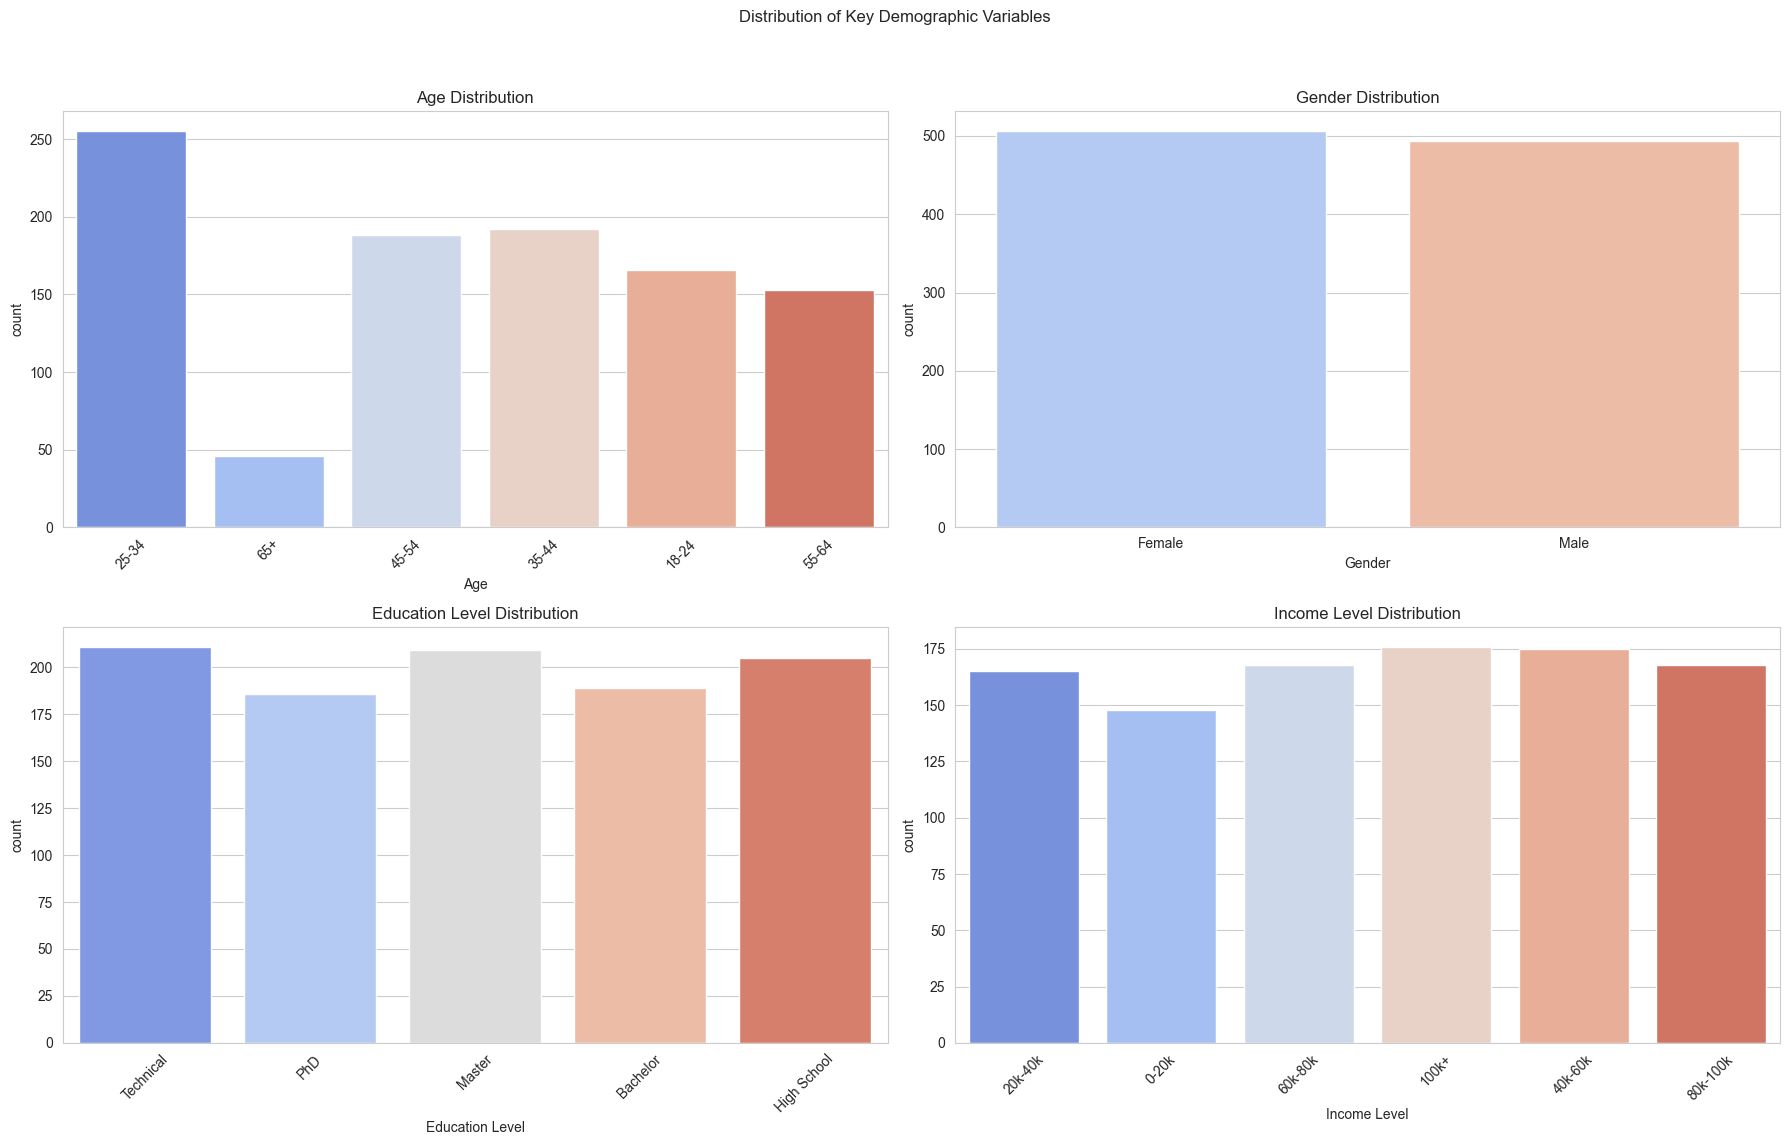

In [3]:
# setting the aesthetic style of the plots  , palette=palette, legend=False
sns.set_style("whitegrid")

# creating subplots for the demographic distributions
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Distribution of Key Demographic Variables')

# age distribution
sns.countplot(ax=axes[0, 0], x='Age', hue='Age',legend=False, data=data, palette='coolwarm')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].tick_params(axis='x', rotation=45)

# gender distribution
sns.countplot(ax=axes[0, 1], x='Gender' ,hue='Gender',legend=False, data=data, palette='coolwarm')
axes[0, 1].set_title('Gender Distribution')

# education level distribution
sns.countplot(ax=axes[1, 0], x='Education Level',hue='Education Level',legend=False, data=data, palette='coolwarm')
axes[1, 0].set_title('Education Level Distribution')
axes[1, 0].tick_params(axis='x', rotation=45)

# income level distribution
sns.countplot(ax=axes[1, 1], x='Income Level',hue='Income Level',legend=False, data=data, palette='coolwarm')
axes[1, 1].set_title('Income Level Distribution')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## - device usage patterns

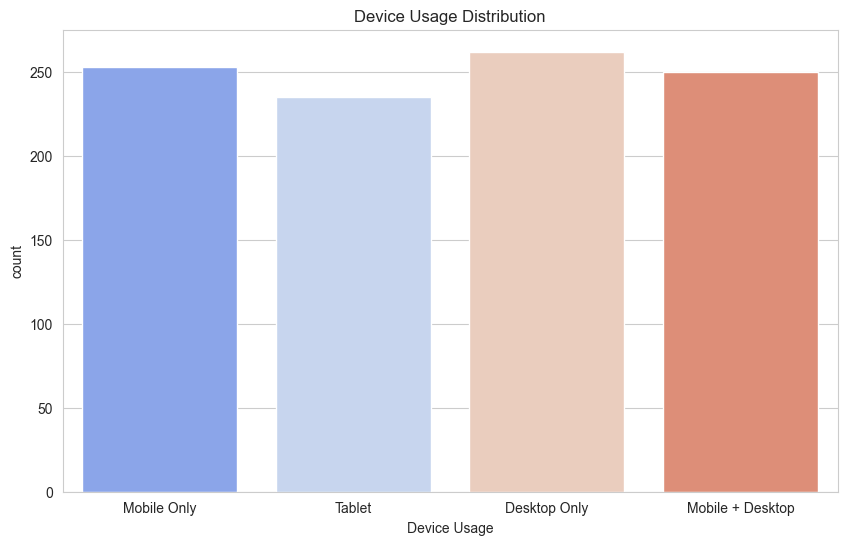

In [4]:
# device usage distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Device Usage', hue='Device Usage', data=data, palette='coolwarm')
plt.title('Device Usage Distribution')
plt.show()

Afin de comprendre les modèles d'activité des utilisateurs et leur interaction avec les publicités(ciblage et une optimisation efficaces des publicités) :

- Analysons le temps moyen que les utilisateurs passent en ligne en semaine par rapport au week-end.
- Étudions les mesures d’engagement des utilisateurs, telles que les likes et les réactions.
- Analysons les mesures d'interaction avec les publicités, notamment les taux de clics (CTR), les taux de conversion et le temps d'interaction avec les publicités.

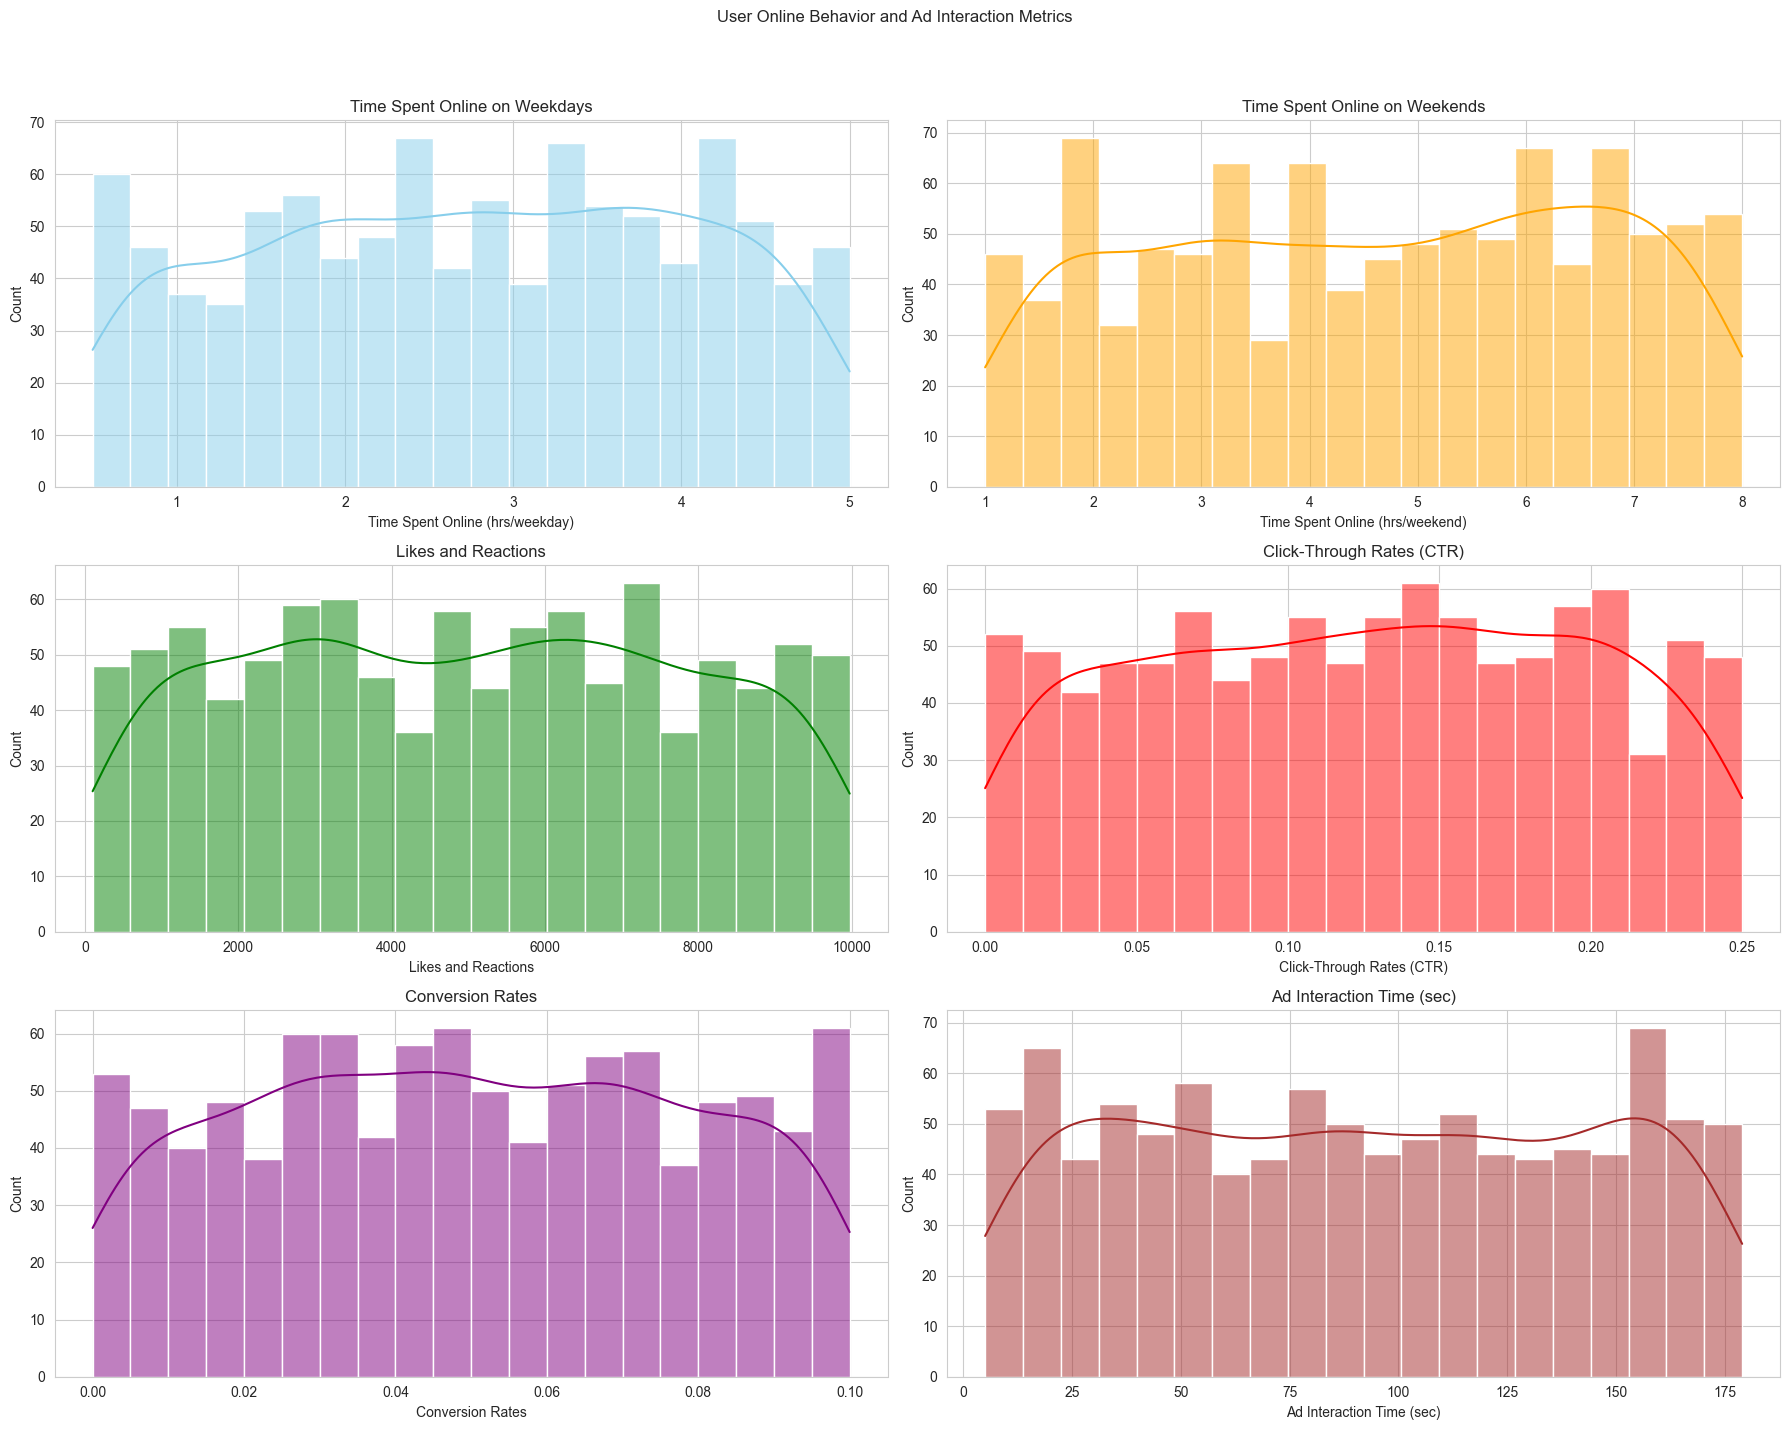

In [5]:
# creating subplots for user online behavior and ad interaction metrics
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
fig.suptitle('User Online Behavior and Ad Interaction Metrics')

# time spent online on weekdays
sns.histplot(ax=axes[0, 0], x='Time Spent Online (hrs/weekday)', data=data, bins=20, kde=True, color='skyblue')
axes[0, 0].set_title('Time Spent Online on Weekdays')

# time spent online on weekends
sns.histplot(ax=axes[0, 1], x='Time Spent Online (hrs/weekend)', data=data, bins=20, kde=True, color='orange')
axes[0, 1].set_title('Time Spent Online on Weekends')

# likes and reactions
sns.histplot(ax=axes[1, 0], x='Likes and Reactions', data=data, bins=20, kde=True, color='green')
axes[1, 0].set_title('Likes and Reactions')

# click-through rates
sns.histplot(ax=axes[1, 1], x='Click-Through Rates (CTR)', data=data, bins=20, kde=True, color='red')
axes[1, 1].set_title('Click-Through Rates (CTR)')

# conversion rates
sns.histplot(ax=axes[2, 0], x='Conversion Rates', data=data, bins=20, kde=True, color='purple')
axes[2, 0].set_title('Conversion Rates')

# ad interaction time
sns.histplot(ax=axes[2, 1], x='Ad Interaction Time (sec)', data=data, bins=20, kde=True, color='brown')
axes[2, 1].set_title('Ad Interaction Time (sec)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

identifions les intérêts les plus communs parmi les utilisateurs, ce qui est essentiel pour segmenter l'audience et adapter les campagnes publicitaires aux préférences des utilisateurs :

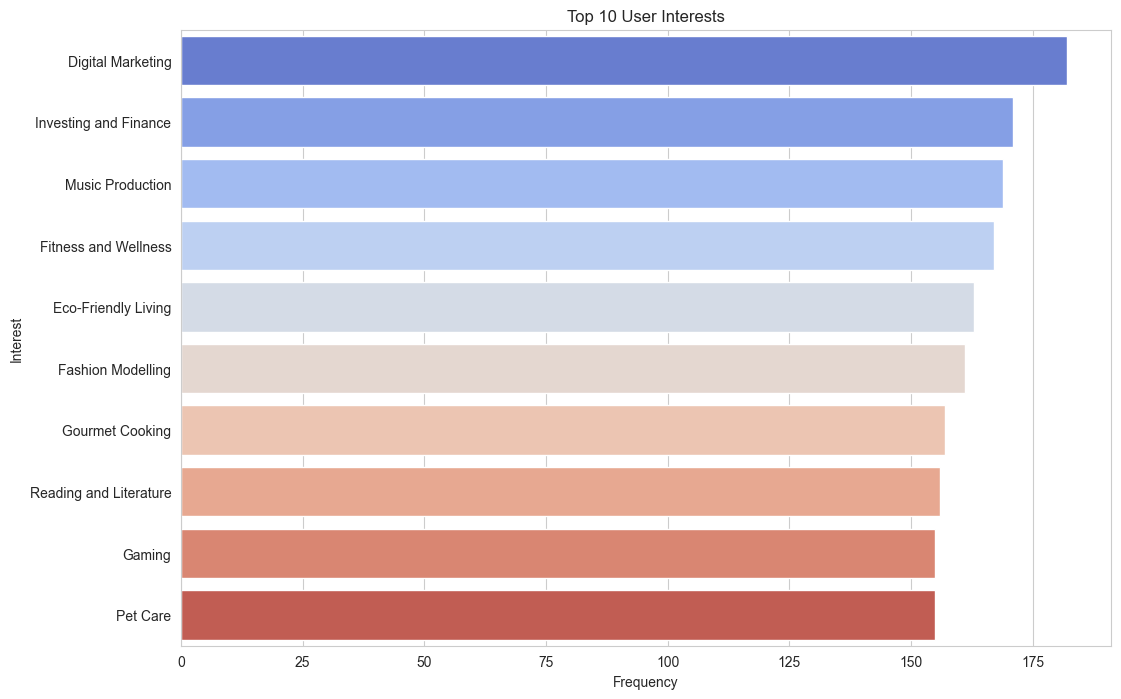

In [6]:
from collections import Counter

# splitting the 'Top Interests' column and creating a list of all interests
interests_list = data['Top Interests'].str.split(', ').sum()

# counting the frequency of each interest
interests_counter = Counter(interests_list)

# converting the counter object to a DataFrame for easier plotting
interests_df = pd.DataFrame(interests_counter.items(), columns=['Interest', 'Frequency']).sort_values(by='Frequency', ascending=False)

# plotting the most common interests
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Interest', hue='Interest', legend=False, data=interests_df.head(10), palette='coolwarm')
plt.title('Top 10 User Interests')
plt.xlabel('Frequency')
plt.ylabel('Interest')
plt.show()

users segmentation into distinct groups for targeted ad campaigns based on :
- Demographics: Age, Gender, Income Level, Education Level
- Behavioural: Time Spent Online, Likes and Reactions, CTR, Conversion Rates
- Interests: Aligning ad content with the top interests identified

implement user profiling and segmentation using clustering techniques or develop personas based on the combination of these attributes :
- creation of more personalized and effective ad campaigns
- enhancing user engagement and conversion rates.

## -selecting a subset of features that could be most indicative of user preferences and behaviour for segmentation and apply a clustering algorithm to create user segments:

In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

# selecting features for clustering
features = ['Age', 'Gender', 'Income Level', 'Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Likes and Reactions', 'Click-Through Rates (CTR)']

# separating the features we want to consider for clustering
X = data[features]

# defining preprocessing for numerical and categorical features
numeric_features = ['Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Likes and Reactions', 'Click-Through Rates (CTR)']
numeric_transformer = StandardScaler()

categorical_features = ['Age', 'Gender', 'Income Level']
categorical_transformer = OneHotEncoder()

# combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# creating a preprocessing and clustering pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('cluster', KMeans(n_clusters=5, random_state=42))])

pipeline.fit(X)
cluster_labels = pipeline.named_steps['cluster'].labels_
data['Cluster'] = cluster_labels

print(data.head())

   User ID    Age  Gender  Location Language Education Level  \
0        1  25-34  Female  Suburban    Hindi       Technical   
1        2    65+    Male     Urban    Hindi             PhD   
2        3  45-54  Female  Suburban  Spanish       Technical   
3        4  35-44  Female     Rural  Spanish             PhD   
4        5  25-34  Female     Urban  English       Technical   

   Likes and Reactions  Followed Accounts  Device Usage  \
0                 5640                190   Mobile Only   
1                 9501                375        Tablet   
2                 4775                187   Mobile Only   
3                 9182                152  Desktop Only   
4                 6848                371   Mobile Only   

   Time Spent Online (hrs/weekday)  Time Spent Online (hrs/weekend)  \
0                              4.5                              1.7   
1                              0.5                              7.7   
2                              4.5             

Le processus de clustering a réussi à segmenter nos utilisateurs en cinq groupes distincts (Clusters 0 à 4). Chaque cluster représente une combinaison unique de caractéristiques que nous avons sélectionnées, notamment l'âge, le sexe, le niveau de revenu, le comportement en ligne et les mesures d'engagement. Ces clusters peuvent servir de base à la création de campagnes publicitaires ciblées adaptées aux préférences et aux comportements de chaque segment.

caracteristiques dominantes:
- Attribut numeriques --> mean
- Attribut categorielles --> mode

In [9]:
# computing the mean values of numerical features for each cluster
cluster_means = data.groupby('Cluster')[numeric_features].mean()

for feature in categorical_features:
    mode_series = data.groupby('Cluster')[feature].agg(lambda x: x.mode()[0])
    cluster_means[feature] = mode_series

print(cluster_means)

         Time Spent Online (hrs/weekday)  Time Spent Online (hrs/weekend)  \
Cluster                                                                     
0                               3.911111                         5.212963   
1                               1.559394                         6.002424   
2                               3.019737                         2.584211   
3                               3.080882                         5.774510   
4                               1.809626                         3.839572   

         Likes and Reactions  Click-Through Rates (CTR)    Age  Gender  \
Cluster                                                                  
0                2409.620370                   0.149588  25-34  Female   
1                5005.121212                   0.179836  35-44    Male   
2                6861.587719                   0.170614  25-34    Male   
3                7457.602941                   0.067971  25-34  Female   
4               

attribuons à chaque cluster un nom qui reflète ses caractéristiques les plus déterminantes, en fonction des valeurs moyennes des caractéristiques numériques et des catégories les plus fréquentes pour les caractéristiques catégorielles. Sur la base de l'analyse groupée, nous pouvons résumer et nommer les segments comme suit :

Cluster 0 – « Week-end Warriors » : activité en ligne élevée le week-end, likes et réactions modérés, majoritairement masculin, tranche d'âge 25-34 ans, niveau de revenu 80 000-100 000.
Cluster 1 – « Engaged Professionals » : activité en ligne équilibrée, likes et réactions élevés, majoritairement masculin, tranche d'âge 25-34 ans, revenus élevés (100 000+).
Groupe 2 – « Low-Key Users » : activité en ligne modérée à élevée le week-end, likes et réactions modérés, majoritairement masculin, tranche d'âge 25-34 ans, niveau de revenu 60 000-80 000, CTR inférieur.
Groupe 3 – « Active Explorers » : activité globale en ligne élevée, likes et réactions plus faibles, principalement des femmes, tranche d'âge 25-34 ans, niveau de revenu 60 000-80 000.
Groupe 4 – « Budget Browsers » : activité en ligne modérée, likes et réactions les plus faibles, majoritairement féminine, tranche d'âge 25-34 ans, niveau de revenu le plus bas (0-20k), CTR inférieur.

In [10]:
import numpy as np

# preparing data for radar chart
features_to_plot = ['Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Likes and Reactions', 'Click-Through Rates (CTR)']
labels = np.array(features_to_plot)

# creating a dataframe for the radar chart
radar_df = cluster_means[features_to_plot].reset_index()

# normalizing the data
radar_df_normalized = radar_df.copy()
for feature in features_to_plot:
    radar_df_normalized[feature] = (radar_df[feature] - radar_df[feature].min()) / (radar_df[feature].max() - radar_df[feature].min())

# adding a full circle for plotting
radar_df_normalized = radar_df_normalized.add(radar_df_normalized.iloc[0])

# assigning names to segments
segment_names = ['Weekend Warriors', 'Engaged Professionals', 'Low-Key Users', 'Active Explorers', 'Budget Browsers']



Créons maintenant une visualisation qui reflète ces segments, en utilisant les moyennes de cluster pour les caractéristiques numériques et en mettant en évidence les caractéristiques distinctives de chaque segment. Nous allons créer un graphique radar qui compare les valeurs moyennes des entités sélectionnées dans les clusters, fournissant une représentation visuelle du profil de chaque segment 

In [11]:
import plotly.graph_objects as go
fig = go.Figure()

# Loop through each segment to add to the radar chart
for i, segment in enumerate(segment_names):
    fig.add_trace(go.Scatterpolar(
        r=radar_df_normalized.iloc[i][features_to_plot].values.tolist() + [radar_df_normalized.iloc[i][features_to_plot].values[0]],  # Add the first value at the end to close the radar chart
        theta=labels.tolist() + [labels[0]],  # Add the first label at the end to close the radar chart
        fill='toself',
        name=segment,
        hoverinfo='text',
        text=[f"{label}: {value:.2f}" for label, value in zip(features_to_plot, radar_df_normalized.iloc[i][features_to_plot])] + [f"{labels[0]}: {radar_df_normalized.iloc[i][features_to_plot][0]:.2f}"]  # Adding hover text for each feature
    ))

# Update the layout to finalize the radar chart
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )),
    showlegend=True,
    title='User Segments Profile'
)

fig.show()

C:\Users\selfe\AppData\Local\Temp\ipykernel_33164\3580696136.py:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\selfe\AppData\Local\Temp\ipykernel_33164\3580696136.py:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\selfe\AppData\Local\Temp\ipykernel_33164\3580696136.py:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\selfe\AppData\Local\Temp\ipykernel_33164\3580696136.py:12: FutureWarning:

Series.__g

In [12]:

# loop through each segment to add to the radar chart
for i, segment in enumerate(segment_names):
    fig.add_trace(go.Scatterpolar(
        r=radar_df_normalized.iloc[i][features_to_plot].values.tolist() + [radar_df_normalized.iloc[i][features_to_plot].values[0]],  # Add the first value at the end to close the radar chart
        theta=labels.tolist() + [labels[0]],  # add the first label at the end to close the radar chart
        fill='toself',
        name=segment,
        hoverinfo='text',
        text=[f"{label}: {value:.2f}" for label, value in zip(features_to_plot, radar_df_normalized.iloc[i][features_to_plot])]+[f"{labels[0]}: {radar_df_normalized.iloc[i][features_to_plot][0]:.2f}"]  # Adding hover text for each feature
    ))

# update the layout to finalize the radar chart
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )),
    showlegend=True,
    title='User Segments Profile'
)

fig.show()

C:\Users\selfe\AppData\Local\Temp\ipykernel_33164\2264383740.py:9: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\selfe\AppData\Local\Temp\ipykernel_33164\2264383740.py:9: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\selfe\AppData\Local\Temp\ipykernel_33164\2264383740.py:9: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\selfe\AppData\Local\Temp\ipykernel_33164\2264383740.py:9: FutureWarning:

Series.__getit

Le tableau ci-dessus est utile aux spécialistes du marketing pour comprendre le comportement des différents segments d'utilisateurs et adapter leurs stratégies publicitaires en conséquence. Par exemple, les publicités ciblant les « Weekend Warriors » pourraient être programmées pour le week-end où ils sont les plus actifs, tandis que les « Engaged Professionals » pourraient mieux répondre aux publicités réparties uniformément tout au long de la semaine.